In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.shape

(107, 2)

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
#Droplast 2 rows
df.drop([106,105],inplace=True,axis=0)

In [8]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

## Convert Month into DateTime

In [10]:
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize the Date

<AxesSubplot:xlabel='Month'>

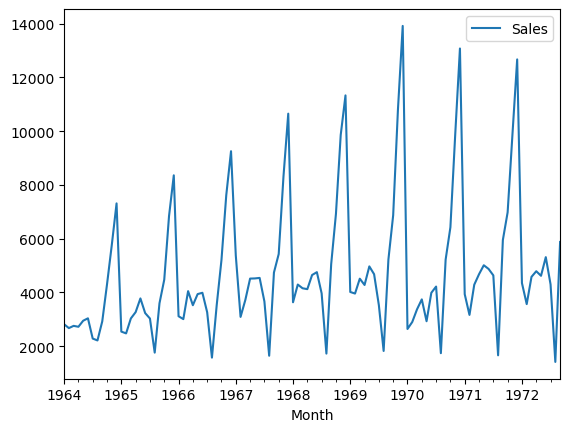

In [15]:
df.plot()

# Decompose

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

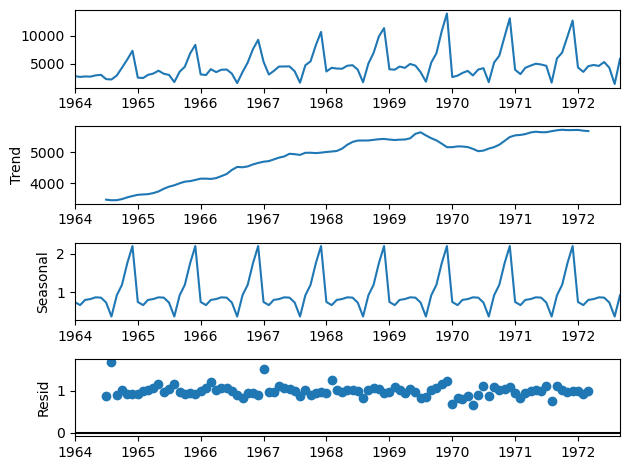

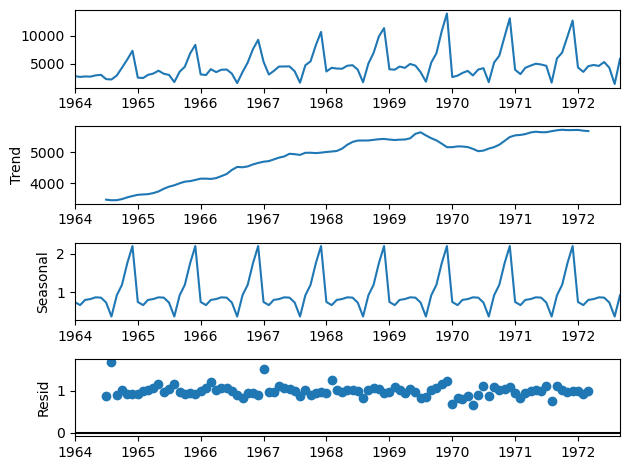

In [49]:
df_de=seasonal_decompose(df,model='mul')
df_de.plot()

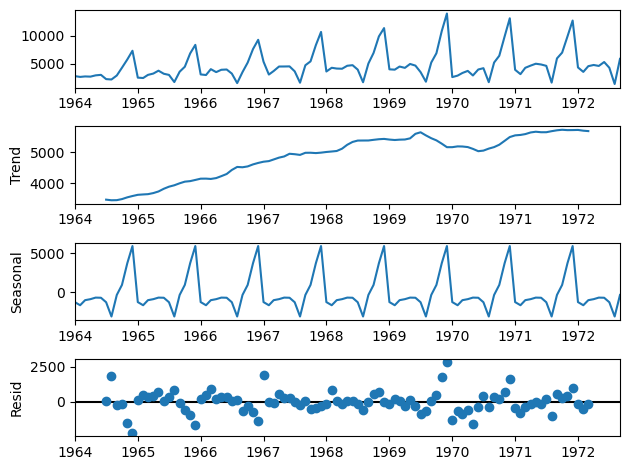

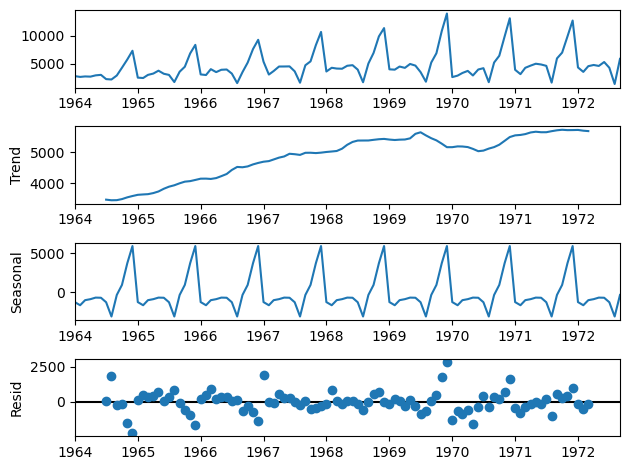

In [50]:
df_de_a=seasonal_decompose(df,model='add')
df_de_a.plot()

## Test for stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

In [23]:
print('ADF',test_result[0])
print('p-value',test_result[1])
print('critical values:')
for key,value in test_result[4].items():
    print(key,value)

ADF -1.8335930563276297
p-value 0.3639157716602417
critical values:
1% -3.502704609582561
5% -2.8931578098779522
10% -2.583636712914788


# Differencing

In [34]:
df_dif=df['Sales']-df['Sales'].shift(12)

In [35]:
df_dif.head(13)

Month
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
1964-06-01      NaN
1964-07-01      NaN
1964-08-01      NaN
1964-09-01      NaN
1964-10-01      NaN
1964-11-01      NaN
1964-12-01      NaN
1965-01-01   -274.0
Name: Sales, dtype: float64

In [ ]:
#or#

In [28]:
df_log=df.Sales.diff()

In [29]:
df_log

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 105, dtype: float64

In [30]:
df_log.dropna(inplace=True)

In [33]:
df_log_adf=adfuller(df_log)
df_log_adf

(-7.1898964480510195,
 2.519620447386778e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915888)

In [ ]:
#so now the data is stationary

In [37]:
df_dif.dropna(inplace=True)

In [38]:
df_dif=adfuller(df_dif)
df_dif

(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

# Exponential Smoothing

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [53]:
df_ex=ExponentialSmoothing(df_log,trend='add',seasonal='add').fit()

C:\Users\abhay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\abhay\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [54]:
df_ex.summary()

Dep. Variable:,Sales,No. Observations:,104
Model:,ExponentialSmoothing,SSE,73869443.951
Optimized:,True,AIC,1433.236
Trend:,Additive,BIC,1475.546
Seasonal:,Additive,AICC,1441.283
Seasonal Periods:,12,Date:,"Sun, 19 Feb 2023"
Box-Cox:,False,Time:,16:08:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0050000,beta,True


In [56]:
#Residual
df_res=df_ex.resid
df_res

Month
1964-02-01    304.668734
1964-03-01   -442.408249
1964-04-01   -124.707537
1964-05-01    -93.738044
1964-06-01    239.641445
                 ...    
1972-05-01   -331.804735
1972-06-01    472.392542
1972-07-01   -818.990650
1972-08-01   -307.504914
1972-09-01    503.665439
Length: 104, dtype: float64

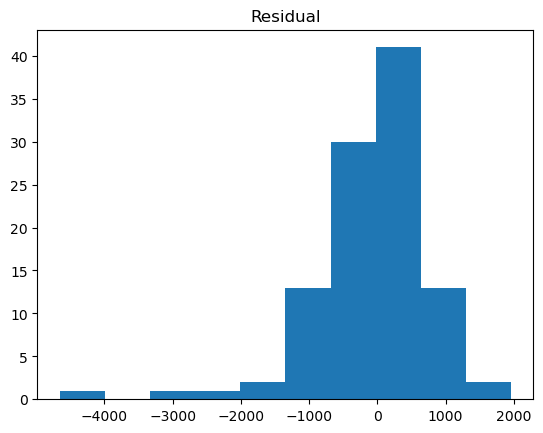

In [57]:
#histogram of residual
plt.hist(df_res)
plt.title('Residual')
plt.show()

### ACF plot`

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

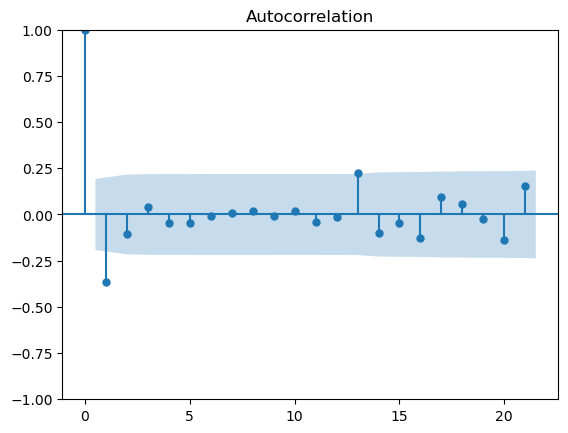

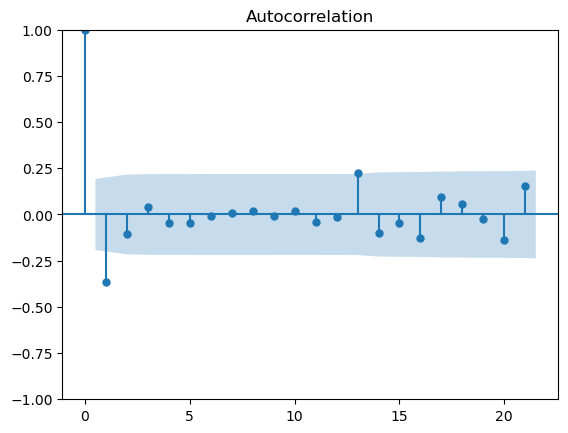

In [59]:
plot_acf(df_res)

C:\Users\abhay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


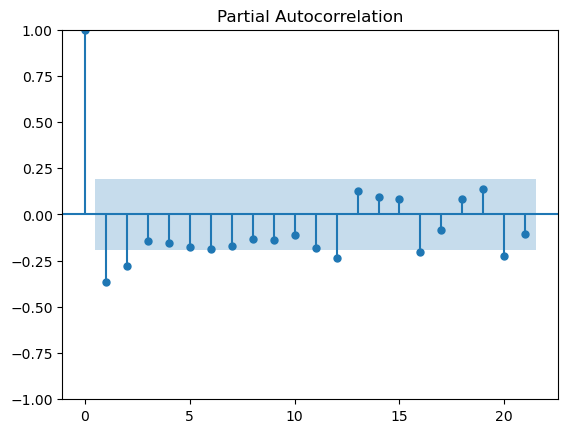

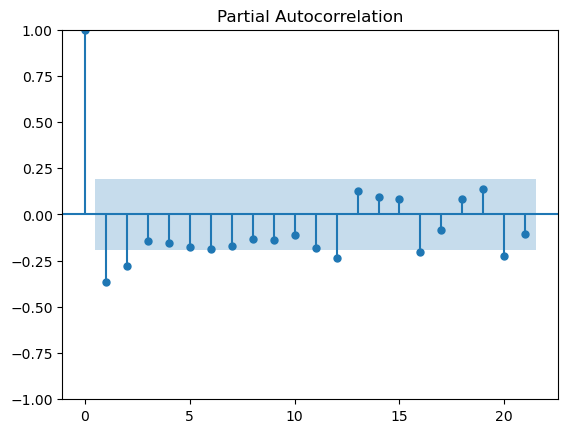

In [60]:
plot_pacf(df_res)

In [61]:
#squaring residual
df_sq=pow(df_res,2)
df_sq

Month
1964-02-01     92823.037609
1964-03-01    195725.058694
1964-04-01     15551.969758
1964-05-01      8786.820911
1964-06-01     57428.022015
                  ...      
1972-05-01    110094.382413
1972-06-01    223154.713274
1972-07-01    670745.684798
1972-08-01     94559.271939
1972-09-01    253678.874492
Length: 104, dtype: float64

In [62]:
df_mse=(df_sq.sum())/len(df_sq)
df_mse

710283.1149165529

In [64]:
df_rmse=np.sqrt(df_mse)
df_rmse

842.782958368614

## Forcast

In [67]:
df_pred=df_ex.forecast(19)

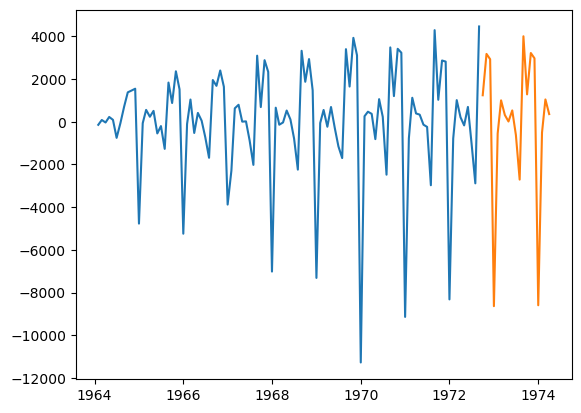

In [69]:
plt.plot(df_log)
plt.plot(df_pred)

## Auto Arima

In [70]:
from  pmdarima import auto_arima

In [71]:
df_model=auto_arima(df_log)

In [72]:
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:                        SARIMAX   Log Likelihood                -966.872
Date:                Sun, 19 Feb 2023   AIC                           1935.745
Time:                        16:55:09   BIC                           1938.389
Sample:                    02-01-1964   HQIC                          1936.816
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.961e+06    5.4e+05     12.901      0.000     5.9e+06    8.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
df_model_res=df_model.resid()

In [79]:
df_model_res

Month
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
1964-06-01      90.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Length: 104, dtype: float64

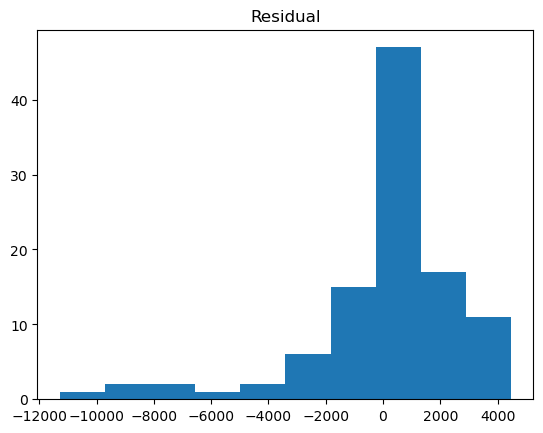

In [81]:
plt.hist(df_model_res)
plt.title('Residual')
plt.show()

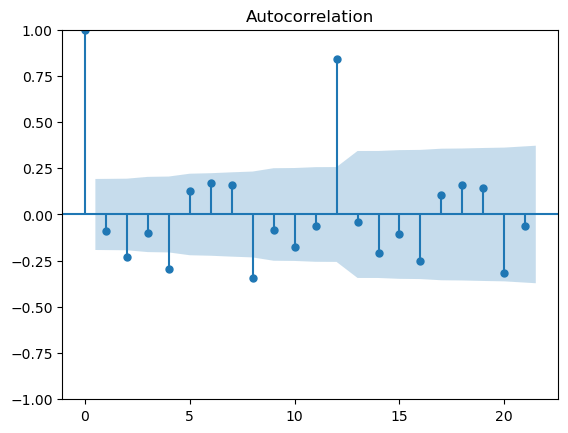

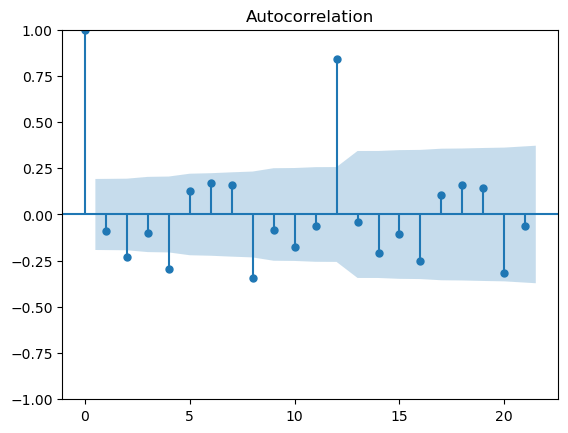

In [82]:
plot_acf(df_model_res)

In [73]:
df_pred1=df_model.predict(19)
df_pred1

1972-10-01    0.0
1972-11-01    0.0
1972-12-01    0.0
1973-01-01    0.0
1973-02-01    0.0
1973-03-01    0.0
1973-04-01    0.0
1973-05-01    0.0
1973-06-01    0.0
1973-07-01    0.0
1973-08-01    0.0
1973-09-01    0.0
1973-10-01    0.0
1973-11-01    0.0
1973-12-01    0.0
1974-01-01    0.0
1974-02-01    0.0
1974-03-01    0.0
1974-04-01    0.0
Freq: MS, dtype: float64

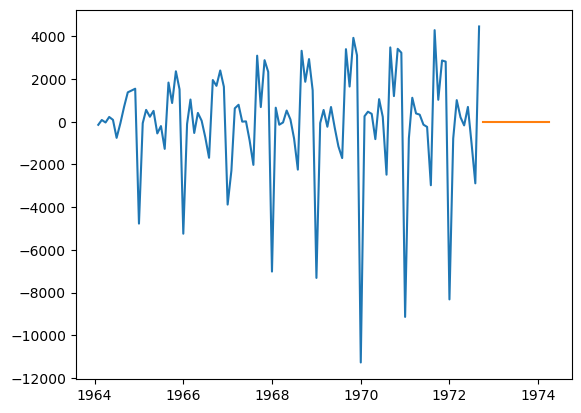

In [75]:
plt.plot(df_log)
plt.plot(df_pred1)